In [1]:
%%capture
import importlib
import importlib
package = "icrawler"
try:
    importlib.import_module(package)
except ImportError:
    !pip install {package}
    importlib.import_module(package)
    
    
package = "tensorflow"
try:
    importlib.import_module(package)
except ImportError:
    !pip install {package}
    importlib.import_module(package)

package = "matplotlib"
try:
    importlib.import_module(package)
except ImportError:
    !pip install {package}
    importlib.import_module(package)
    

try:
    from sklearn.metrics.pairwise import cosine_similarity
except ImportError:
    !pip install -U scikit-learn
    from sklearn.metrics.pairwise import cosine_similarity


import os  # Import the os module to interact with the operating system.
import shutil  # Import the shutil module to perform high-level file operations such as copying and deleting.
from icrawler.builtin import GoogleImageCrawler  # Import the GoogleImageCrawler class from the icrawler.builtin module to download images from Google.

# Define the directory name and the number of images to download
query = "cat"  # Set a search query for images to download.
dir_name = query  # Set the name of the directory to save the downloaded images.
num_images_query = 3  # Set the number of images to download.

# Delete the directory if it exists
if os.path.exists(dir_name):  # Check if the directory exists.
    shutil.rmtree(dir_name)  # If the directory exists, remove it and all its contents.
os.mkdir(dir_name)  # Create a new directory with the specified name.

# Set up the GoogleImageCrawler to download images
google_crawler = GoogleImageCrawler(
    feeder_threads=1,  # Set the number of threads to use for feeding URLs to the parser.
    parser_threads=2,  # Set the number of threads to use for parsing the HTML pages.
    downloader_threads=4,  # Set the number of threads to use for downloading the images.
    storage={'root_dir': dir_name}  # Set the directory to save the downloaded images.
)

# Start the crawler to download images
google_crawler.crawl(
    keyword=dir_name,  # Set the search query for images to download.
    max_num=num_images_query,  # Set the number of images to download.
    min_size=(200, 200),  # Set the minimum size of the images to download.
    file_idx_offset='auto'  # Set the index offset for the downloaded images.
)


2023-04-19 18:10:34.375982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
%%capture
import os                    # Import the os module to interact with the operating system.
import shutil                # Import the shutil module to perform high-level file operations such as copying and deleting.
from icrawler.builtin import GoogleImageCrawler   # Import the GoogleImageCrawler class from the icrawler.builtin module to download images from Google.

num_images = 55 # Set the default number of images to download.

# Define a function to download images.
def download_images(dir_name, num_images = 5):
    # Delete the directory if it exists.
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    # Create a new directory with the specified name.
    os.mkdir(dir_name)

    # Set up the GoogleImageCrawler to download images.
    google_crawler = GoogleImageCrawler(
        feeder_threads=1,
        parser_threads=1,
        downloader_threads=4,
        storage={'root_dir': dir_name}
    )

    # Start the crawler to download images with the specified parameters.
    google_crawler.crawl(
        keyword=dir_name,
        max_num=num_images,
        min_size=(200, 200),
        file_idx_offset='auto'
    )

# Create a list of directory names to download images for.
#dir_names = [ "kitten","dog","monkey","rabbit","deer","giraffe", "elephant", "rhino", "lion", "tiger" ,"dinosaur","panda","unicorn","dragonfly","mammoth","squirrell","porcupine","merlion","mermaid"]
dir_names = [ "kitten","dog","rabbit","deer","giraffe", "elephant", "rhino", "lion", "tiger" ,"dinosaur","panda","unicorn","dragonfly","mammoth","squirrell","porcupine"]
#dir_names = [ "kitten","dog","monkey"]

# Loop over the directory names and download images for each one.
for i in dir_names:
    download_images(i,num_images)


In [3]:
%%capture
import os          # Import the os module to interact with the operating system.
import shutil      # Import the shutil module to perform high-level file operations such as copying and deleting.

new_dir_name = "animals"         # Define the name of the new directory to move files to.

# Delete the directory if it exists, and create a new empty directory.
shutil.rmtree(new_dir_name, ignore_errors=True)  
os.makedirs(new_dir_name)

# Loop through each directory and move the files to the new directory.
file_num = 1    # Start numbering the files at 1.
for dir_name in dir_names:
    for file_name in sorted(os.listdir(dir_name)):   # Loop through each file in the directory, sorted in ascending order.
        old_path = os.path.join(dir_name, file_name)   # Get the full path to the old file.
        new_file_name = f"{file_num:04d}_{file_name}"   # Use leading zeros for file numbering.
        new_path = os.path.join(new_dir_name, new_file_name)   # Get the full path to the new file.
        shutil.copyfile(old_path, new_path)   # Copy the file to the new directory.
        file_num += 1    # Increment the file number for the next file.

dir_path = "animals"

# Get a list of all files in the directory
file_list = os.listdir(dir_path)

# Loop through each file and delete files that are not PNG or JPG files
for file_name in file_list:
    if not file_name.endswith(".png") and not file_name.endswith(".jpg"):
        os.remove(os.path.join(dir_path, file_name))


In [4]:

import os                    # Import the os module to interact with the operating system.
import tensorflow as tf      # Import the TensorFlow module.
import numpy as np           # Import the NumPy module.
import csv                   # Import the CSV module.

# Load the InceptionV3 model.
model = tf.keras.applications.InceptionV3()

# Define the size of the input images.
img_size = (299, 299)

# Define a function to preprocess the input images.
def preprocess_img(img_path):
    # Load the image and resize it to the specified size.
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    # Convert the image to a NumPy array.
    x = tf.keras.preprocessing.image.img_to_array(img)
    # Preprocess the image to make it compatible with the InceptionV3 model.
    x = tf.keras.applications.inception_v3.preprocess_input(x)
    return x

# Define a function to get the predicted labels for the input images.
def get_labels(img_path):
    # Preprocess the image.
    x = preprocess_img(img_path)
    # Add an extra dimension to the image.
    x = np.expand_dims(x, axis=0)
    # Get the predicted probabilities for the image.
    preds = model.predict(x)
    # Get the top three predicted labels.
    labels = tf.keras.applications.inception_v3.decode_predictions(preds, top=3)[0]
    return [label[1] for label in labels]

# Get the file names of the images in the "animals" directory.
img_dir = "animals"
img_names = sorted(os.listdir(img_dir))

# Get the predicted labels for each image.
image_surrogates = {}
for img_name in img_names:
    img_path = os.path.join(img_dir, img_name)
    labels = get_labels(img_path)
    image_surrogates[img_name] = labels

# Print the image surrogates.
for img_name, labels in image_surrogates.items():
    print(f"{img_name}: {labels}")

# Write the image surrogates to a CSV file.
with open("textual_surrogate.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["img_name", "labels"])

    for img_name, labels in image_surrogates.items():
        labels_str = ", ".join(str(label) for label in labels)
        writer.writerow([img_name, labels_str])


2023-04-19 18:15:51.565723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 105ms/step


/Users/thomassebastian/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 129ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 103ms/step
0001_000001.jpg: ['tabby', 'Egyptian_cat', 'tiger_cat']
0002_000002.jpg: ['Siamese_cat', 'Persian_cat', 'lynx']
0003_000003.jpg: ['schipperke', 'Egyptian_cat', 'skunk']
0004_000004.jpg: ['tabby', 'tiger_cat', 'Persian_cat']
0005_000005.jpg: ['fur_coat', 'wig', 'cloak']
0006_000006.jpg: ['quilt', 'plastic_bag', 'bath_towel']
0007_000007.jpg: ['tabby', 'tiger_cat', 'Egyptian_cat']
0008_000008.jpg: ['tabby', 'Egyptian_cat', 'tiger_cat']
0009_000009.jpg: ['carton', 'Christmas_stocking', 'packet']
0010_000010.jpg: ['Egyptian_cat', 'weasel', 'Siamese_cat']
0011_000011.jpg: ['hamster', 'weasel', 'mink']
0012_000012.jpg: ['Siamese_cat', 'Persian_cat', 'howler_monkey']
0013_000013.jpg: ['tiger_cat', 'tabby', 'Egyptian_cat']
0014_000014.jpg: ['polecat', 'weasel', 'hamster']
0015_000015.jpg: ['Egyptian_cat', 'tabby', 'tiger_cat']
0016_000016.jpg: ['Shetland_sheepdog', 'tabby', 'swab']
0017_000017.jpg: ['tabby', 'tiger_cat', 'Egyptian_cat']
0018

In [5]:
%%capture
import os                                # Import the os module to interact with the operating system.
import numpy as np                       # Import the numpy library for numerical operations.
import tensorflow as tf                  # Import the TensorFlow library for deep learning computations.
import matplotlib.pyplot as plt          # Import the matplotlib library for data visualization.

# Load the InceptionV3 model
model = tf.keras.applications.InceptionV3(include_top=False, pooling='avg')

# Define the size of the input images
img_size = (299, 299)

# Define a function to preprocess the input images
def preprocess_img(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = tf.keras.applications.inception_v3.preprocess_input(x)
    return x

# Define a function to compute feature vectors for a list of images
def compute_features(dir_name, names):
    features = {}
    for name in names:
        path = os.path.join(dir_name, name)
        img = preprocess_img(path)
        feature_vector = model.predict(np.expand_dims(img, axis=0)).flatten()
        features[name] = feature_vector
    return features

# Get the file names of the images in the "query" directory
query_dir = query
query_names = sorted(os.listdir(query_dir))

# Get the file names of the images in the "animals" directory
animals_dir = "animals"
animals_names = sorted(os.listdir(animals_dir))

# Compute the feature vectors for all the images in the "animals" directory
animals_features = compute_features(animals_dir, animals_names)

# Compute the feature vectors for all the images in the "query" directory
query_features = compute_features(query_dir, query_names)


In [6]:
import os
# Number of query files 
files_query = os.listdir(query)

# Number of reference files 
num_files_query = len(files_query)

print(f"The number of query files: {num_files_query}")

files_reference = os.listdir(new_dir_name)
num_files_reference = len(files_reference)

print(f"The number of reference files: {num_files_reference}")

The number of query files: 5
The number of reference files: 904


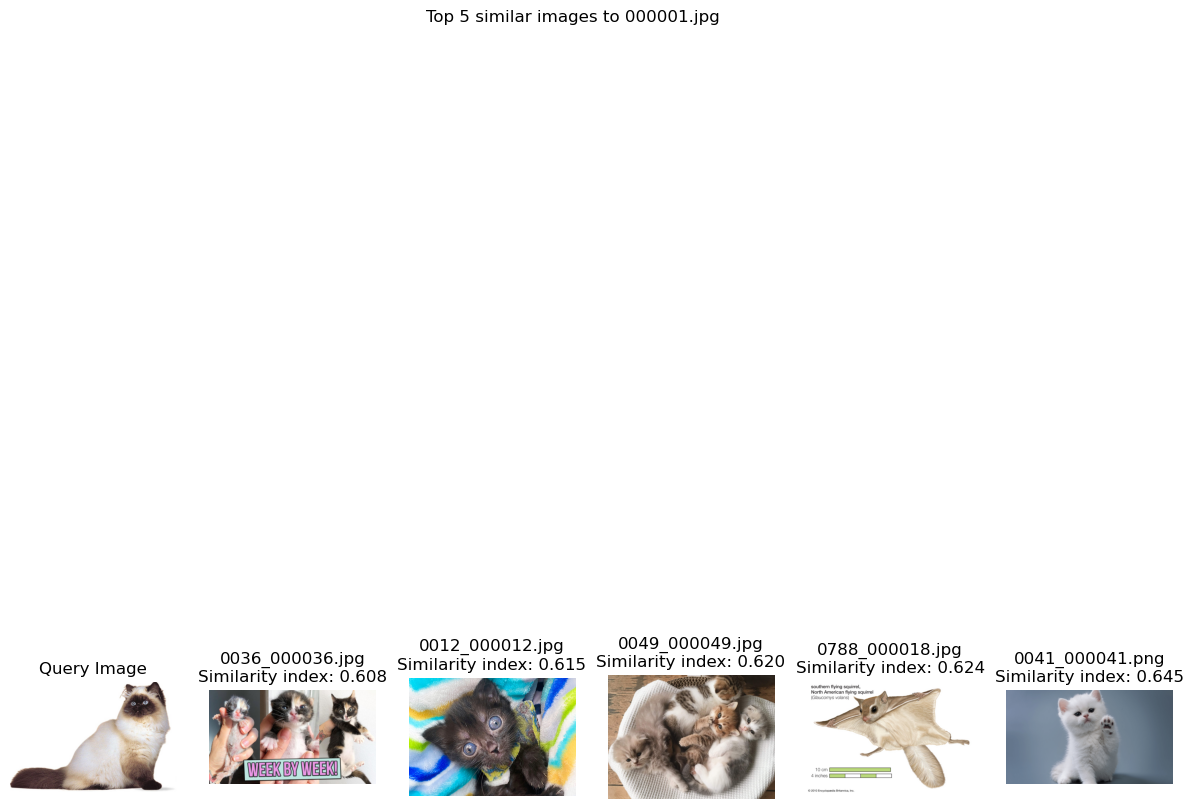

SyntaxError: not a PNG file (<string>)

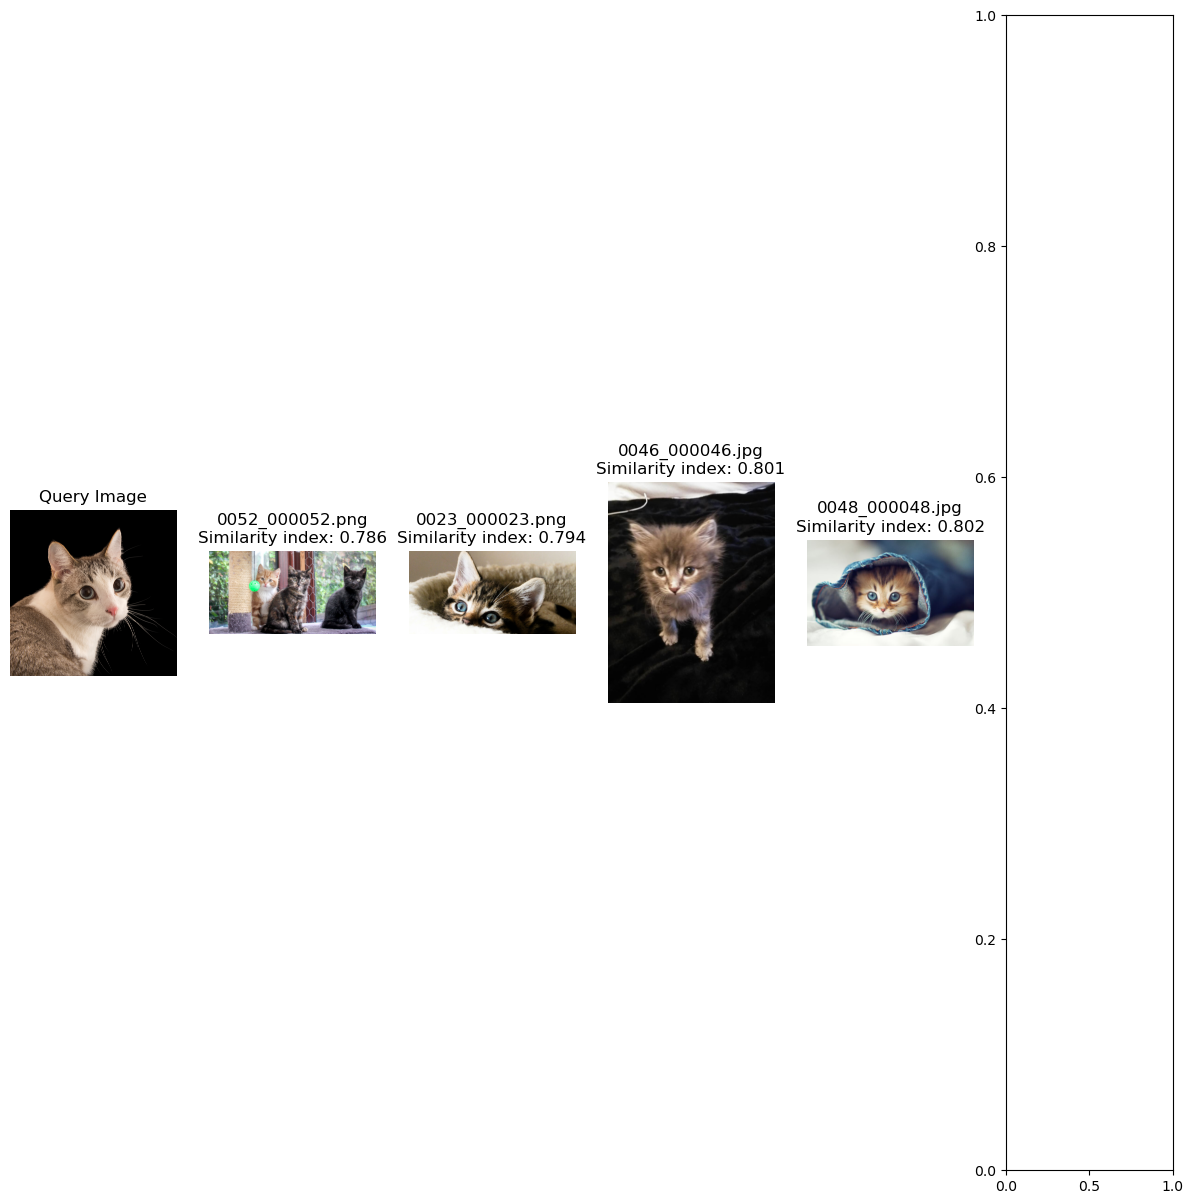

In [7]:
from sklearn.metrics.pairwise import cosine_similarity    # Import the cosine_similarity function from the sklearn.metrics.pairwise module.

# Compute the cosine similarity matrix between the images in the "query" and "animals" directories.
similarity_matrix = np.zeros((len(query_names), len(animals_names)))   # Create a numpy array with dimensions (len(query_names), len(animals_names)) filled with zeros.
for i in range(len(query_names)):
    query_name = query_names[i]  # Get the name of the query image at index i.
    query_feature = query_features[query_name]   # Get the feature vector for the query image.
    for j in range(len(animals_names)):
        animals_name = animals_names[j]  # Get the name of the animals image at index j.
        animals_feature = animals_features[animals_name]   # Get the feature vector for the animals image.
        similarity = cosine_similarity([query_feature], [animals_feature])[0][0]    # Compute the cosine similarity between the query and animals images.
        similarity_matrix[i, j] = similarity   # Store the similarity value in the similarity matrix.

# Get the top 5 similar images to each image in the "query" directory.
top_similarities = np.argsort(similarity_matrix, axis=1)[:, -6:-1]   # Get the indices of the top 5 most similar images for each query image.

# Display the top 5 similar images and similarity index for each image in the "query" directory.
for i, query_name in enumerate(query_names):
    fig, axs = plt.subplots(1, 6, figsize=(15, 15))   # Create a figure with 6 subplots, one for the query image and 5 for the top 5 most similar images.
    # Show the query image.
    query_path = os.path.join(query_dir, query_name)   # Get the path to the query image.
    query_img = plt.imread(query_path)   # Read the query image.
    axs[0].imshow(query_img)   # Show the query image in the first subplot.
    axs[0].set_title("Query Image")   # Set the title of the first subplot.
    axs[0].axis('off')   # Turn off the axis for the first subplot.
    # Show the top 5 similar images.
    for j, index in enumerate(top_similarities[i]):
        animals_name = animals_names[index]   # Get the name of the animals image at the current index.
        similarity = similarity_matrix[i, index]   # Get the similarity value for the current animals image.
        path = os.path.join(animals_dir, animals_name)   # Get the path to the animals image.
        img = plt.imread(path)   # Read the animals image.
        axs[j+1].imshow(img)   # Show the animals image in the current subplot. 
        axs[j+1].set_title(f"{animals_name}\nSimilarity index: {similarity:.3f}")   # Set the title of the current subplot.
        axs[j+1].axis('off')   # Turn off the axis for the current subplot.
    plt.suptitle(f"Top 5 similar images to {query_name}")   # Set the overall title for the figure.
    plt.show()   # Display the figure.

### 